In [96]:
# load packages:
import sys
sys.path.append('../src')
from physion.intrinsic.tools import *
from physion.intrinsic.analysis import RetinotopicMapping
import matplotlib.pylab as plt
import pickle

In [97]:
#dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_07_04/14-41-21'
#dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_09_06/14-38-46'
#dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_09_06/16-00-17'
#dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_09_20/16-03-50'
#dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_09_20/17-12-12'
#dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_03_12/16-18-33'

In [104]:
dataFolder = 'C:/Users/logusr-dws0027/Documents/retinotopic_mapping/2024_07_04/14-41-21'

In [105]:
maps1 = load_maps(dataFolder)

with open(dataFolder+"/trialDict.pkl", 'rb') as file: 
    maps2 = pickle.load(file)

maps = maps1 | maps2
print(maps.keys())


  loading previously calculated maps --> can be overwritten un the UI ! 
 
dict_keys(['datafolder', 'subject', 'dateRecorded', 'raw-img-start', 'raw-img-mid', 'raw-img-stop', 'up-power', 'up-phase', 'down-power', 'down-phase', 'left-power', 'left-phase', 'right-power', 'right-phase', 'altitude-power', 'altitude-delay', 'altitude-phase-diff', 'altitude-retinotopy', 'azimuth-power', 'azimuth-delay', 'azimuth-phase-diff', 'azimuth-retinotopy', 'mouseID', 'altPosMap', 'aziPosMap', 'altPowerMap', 'aziPowerMap', 'vasculatureMap', 'comments', 'params', 'altPosMapf', 'aziPosMapf', 'altPowerMapf', 'aziPowerMapf', 'signMap', 'signMapf', 'rawPatchMap', 'eccentricityMapf', 'finalPatches', 'finalPatchesMarked'])


In [106]:
maps['params']

{'phaseMapFilterSigma': 1.1,
 'signMapFilterSigma': 6,
 'signMapThr': 0.35,
 'splitLocalMinCutStep': 12.5,
 'mergeOverlapThr': 0.1,
 'splitOverlapThr': 1.1,
 'closeIter': 3,
 'openIter': 3,
 'dilationIter': 15,
 'borderWidth': 1,
 'eccMapFilterSigma': 10.0,
 'smallPatchThr': 100,
 'visualSpacePixelSize': 0.5,
 'visualSpaceCloseIter': 15}

In [107]:
data = build_trial_data(maps, with_params=True)
data['vasculatureMap'] = maps['vasculatureMap']
trial = RetinotopicMapping.RetinotopicMappingTrial(**data, finalPatches=maps['finalPatchesMarked'])

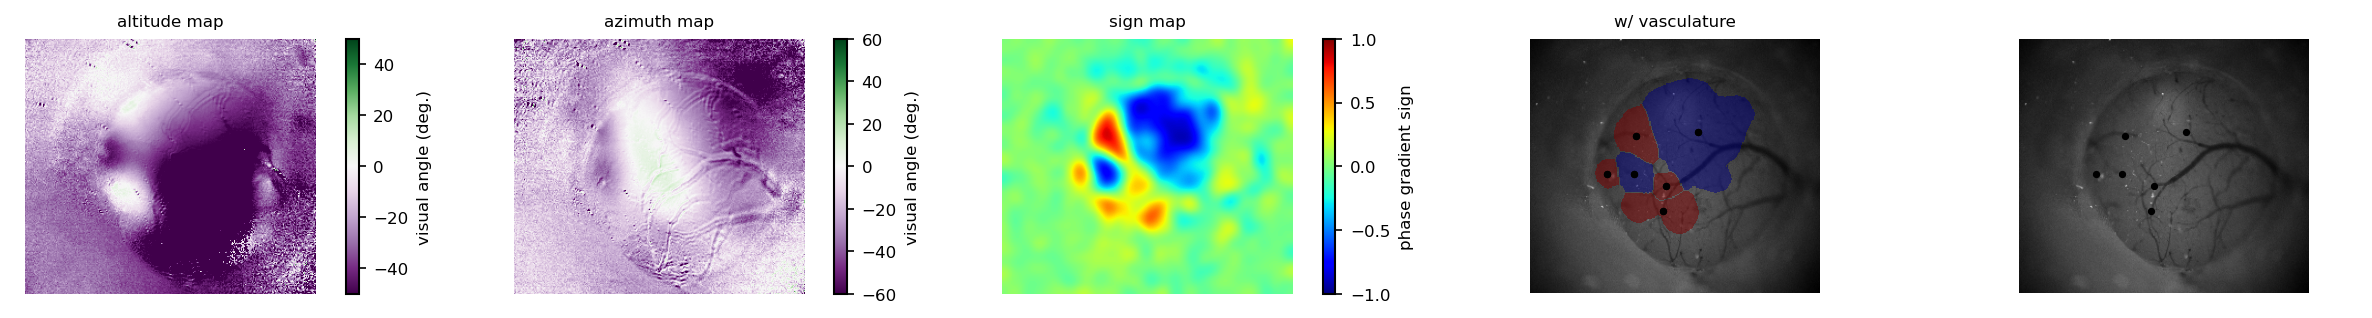

In [108]:
fig, AX = pt.figure(axes=(5,1), figsize=(.9*2,.9*3), wspace=0.4)

for map_type, ax, bounds in zip(['altitude', 'azimuth'], AX[:2],
                                [[-50, 50],[-60, 60]]):
    im = ax.imshow(maps['%s-retinotopy' % map_type], cmap=plt.cm.PRGn,\
                   vmin=bounds[0], vmax=bounds[1])
    fig.colorbar(im, ax=ax,
                 label='visual angle (deg.)')
    ax.set_title('%s map' % map_type)

ax = AX[2]
im = ax.imshow(maps['signMapf'], cmap='jet', vmin=-1, vmax=1)
fig.colorbar(im, ax=ax, label='phase gradient sign')
ax.set_title('sign map')
    
ax=AX[-2]
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
imVasc = maps['vasculatureMap']
ax.imshow(imVasc, cmap=plt.cm.grey, vmin=imVasc.min(), vmax=imVasc.max(), 
          extent=[*ax.get_xlim(), *ax.get_ylim()])
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.set_title('w/ vasculature')

ax = AX[-1]
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.imshow(imVasc, cmap=plt.cm.grey, vmin=imVasc.min(), vmax=imVasc.max(), extent=[*ax.get_xlim(), *ax.get_ylim()])

for ax in AX:
    ax.axis('equal')
    ax.axis('off')    

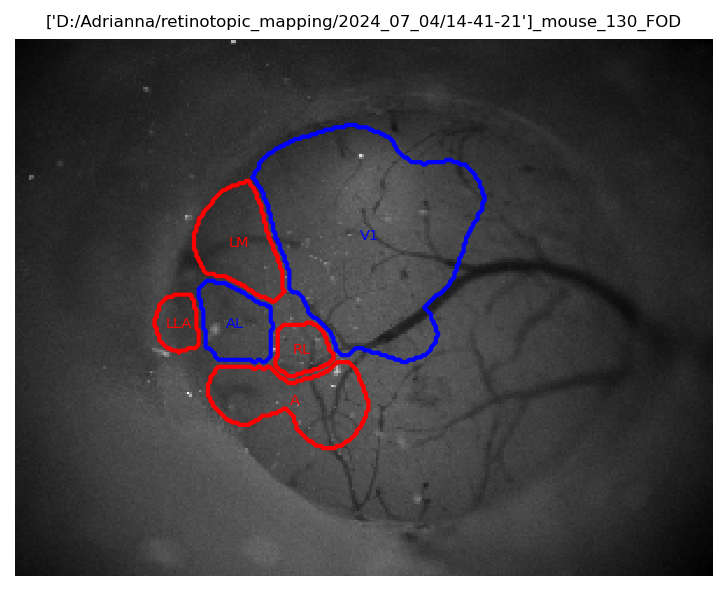

In [109]:
f = plt.figure(figsize=(6,5))
plotAxis = f.add_subplot(111)
_ = trial.plotFinalPatchBorders2(plotAxis=plotAxis, fontSize=7)
plt.show()